In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("train.csv")


In [ ]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255

In [ ]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(0, Z)

def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def deriv_ReLU(Z):
  return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = init_params()
  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i % 10 == 0):
      print("Iteration: ", i)
      print("Accuracy on training data: ", get_accuracy(get_predictions(A2), Y))
      print("Accuracy on dev data: ", get_accuracy(make_predictions(X_dev, W1, b1, W2, b2), Y_dev))
    #if (get_accuracy(make_predictions(X_dev, W1, b1, W2, b2), Y_dev) > 0.95):
      #print("yay 0.95 !!!!!!!!!!!!!!!!!!!!")
      #break
  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.5)

Iteration:  0
[8 5 8 ... 8 9 8] [1 8 5 ... 4 4 2]
Accuracy on training data:  0.12378048780487805
Accuracy on dev data:  0.17
Iteration:  10
[1 2 2 ... 2 4 3] [1 8 5 ... 4 4 2]
Accuracy on training data:  0.32814634146341465
Accuracy on dev data:  0.368
Iteration:  20
[1 8 8 ... 2 4 1] [1 8 5 ... 4 4 2]
Accuracy on training data:  0.5947560975609756
Accuracy on dev data:  0.631
Iteration:  30
[1 8 8 ... 2 4 1] [1 8 5 ... 4 4 2]
Accuracy on training data:  0.7098048780487805
Accuracy on dev data:  0.717
Iteration:  40
[1 8 3 ... 2 4 1] [1 8 5 ... 4 4 2]
Accuracy on training data:  0.6898780487804878
Accuracy on dev data:  0.686
Iteration:  50
[1 8 3 ... 2 4 1] [1 8 5 ... 4 4 2]
Accuracy on training data:  0.707390243902439
Accuracy on dev data:  0.738
Iteration:  60
[1 8 3 ... 2 4 1] [1 8 5 ... 4 4 2]
Accuracy on training data:  0.7414878048780488
Accuracy on dev data:  0.774
Iteration:  70
[1 8 3 ... 2 4 1] [1 8 5 ... 4 4 2]
Accuracy on training data:  0.7711951219512195
Accuracy on de

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def show_image(index, X):
    current_image = X[:, index, None]
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

def test_prediction(index, W1, b1, W2, b2, X, Y):
    prediction = make_predictions(X[:, index, None], W1, b1, W2, b2)
    print("Prediction: ", prediction)
    label = Y[index]
    print("Label: ", label)
    show_image(index, X)
    print(X[:, index, None] * 255)

In [ ]:
from PIL import Image, ImageOps

path = 'image2.png'
image = Image.open(path).convert('L')
image = np.asarray(image)

[[1.42144302e-07]
 [8.40219102e-03]
 [5.22060842e-03]
 [5.76947837e-02]
 [1.25745612e-04]
 [5.41315844e-02]
 [2.99591342e-05]
 [7.46234293e-05]
 [8.74218081e-01]
 [1.02281300e-04]]
Prediction:  [8]


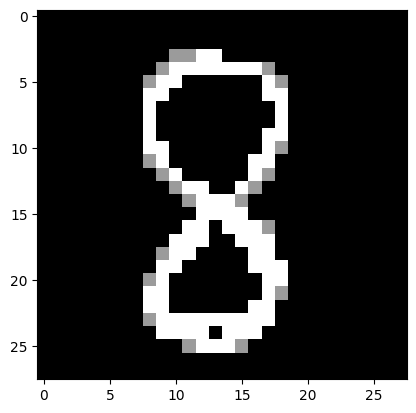

In [ ]:
image = image.reshape(-1, 1) / 255

_, _, _, A2 = forward_prop(W1, b1, W2, b2, image)
print(A2)
prediction = get_predictions(A2)
print("Prediction: ", prediction)

image = image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(image)
plt.show()

Prediction:  [1]
Label:  1


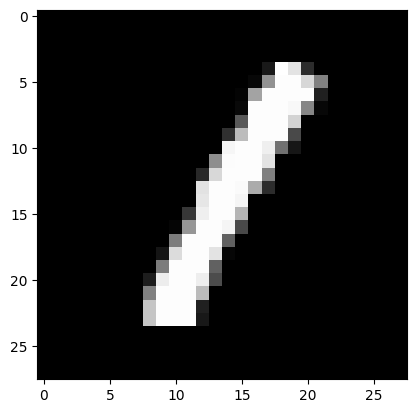

[[  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]


In [ ]:
test_prediction(0, W1, b1, W2, b2, X_train, Y_train)

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
m, n = test.shape
X_test = test.T
X_test = X_test/255

test_predictions = make_predictions(X_test, W1, b1, W2, b2)


In [ ]:
submission = pd.read_csv("submission.csv")

for i in range(28000):
  submission.loc[i, "Label"] = test_predictions[i]

submission.to_csv("submission.csv", index=False)

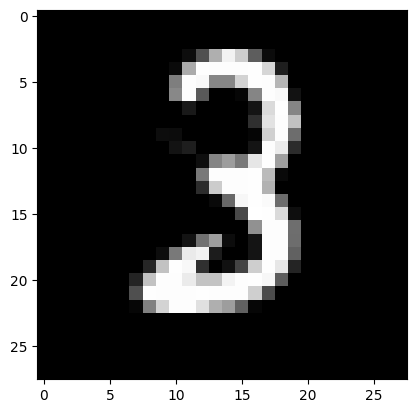

In [ ]:
current_image = np.array(X_test[4])
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

